# Sprawozdanie

## Principal Component Analysis

### Krzysztof Wiśniewski

Kod PCA jest dostępny w całej okazałości na [GitHubie](https://github.com/Argmaster/optmath),
Załączony do maila optmath-1.1.7-py3.9-none-any.whl to archiwum zip, więc jego zawartość również można łatwo podejrzeć.
Aby zainstalować załączony pakiet wystarczy użyć komendy
```
pip install optmath-1.1.7-py3.9-none-any.whl 
```

Minimal Python version required: 3.9

### Do analizy została wykorzystane 2500 obiektów, nasion dyni, 13 atrybutów.

In [9]:
from kw_274276_3 import Session
import matplotlib.pyplot as plt

session = Session("mm_data.csv")
pca_view = session.run_PCA()

session.unique_data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,1429.413259,22.561392,8.284188,5.594077,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,1946.431293,27.130963,10.596728,5.949426,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,1819.227838,27.507925,11.070175,5.360572,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,1688.036576,25.198146,9.691740,5.652329,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,1679.121158,25.352959,9.750782,5.599555,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


## Wykres wartości własnych dla kolejnych składowych głównych

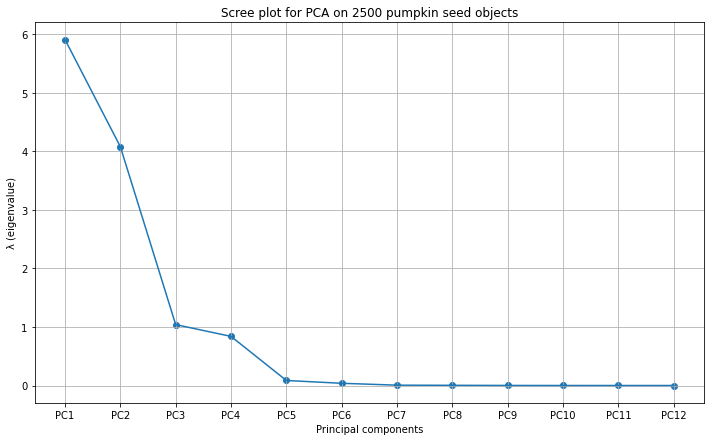

In [10]:
plt.figure(figsize=(12, 7))
pca_view.show_scree_plot()


## Wykres procentowego udziału wariancji wyjaśnianej przez kolejne składowe główne w całkowitej wariancji

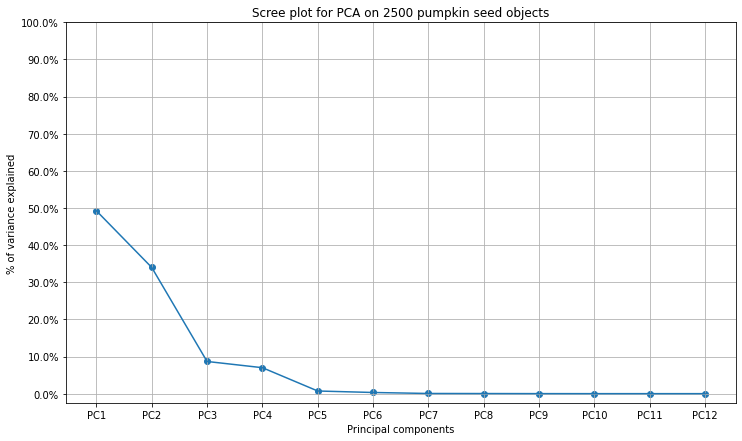

In [11]:
plt.figure(figsize=(12, 7))
pca_view.show_percent_scree_plot()


## Kumulatywny wykres procentowego udziału wariancji wyjaśnianej przez kolejne składowe główne  w całkowitej wariancji

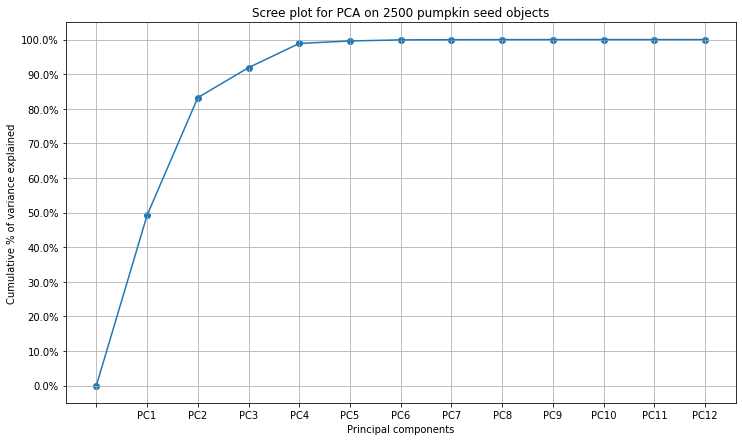

In [12]:
plt.figure(figsize=(12, 7))
pca_view.show_cumulative_percent_scree_plot()


In [13]:
for i, (e, _) in enumerate(pca_view.eigenvalue_vector_pairs):    
    print(f"PC{i + 1} -> {e:.6f}")

PC1 -> 5.908519
PC2 -> 4.078674
PC3 -> 1.040047
PC4 -> 0.838899
PC5 -> 0.085704
PC6 -> 0.037757
PC7 -> 0.005672
PC8 -> 0.003422
PC9 -> 0.001037
PC10 -> 0.000172
PC11 -> 0.000093
PC12 -> 0.000004


### Ilość składowych głównych

została dobrana na podstawie kryterium Kaisera i wynosi ona 3. 

PC3 posiada wartość własną 1.040.

Pierwsze 3 składowe główne wyjaśniają 91.9% zmienności danych,

Taką samą ilość składowych wskazuje kryterium osypiska.


# Wykresy składowych głównych względem siebie

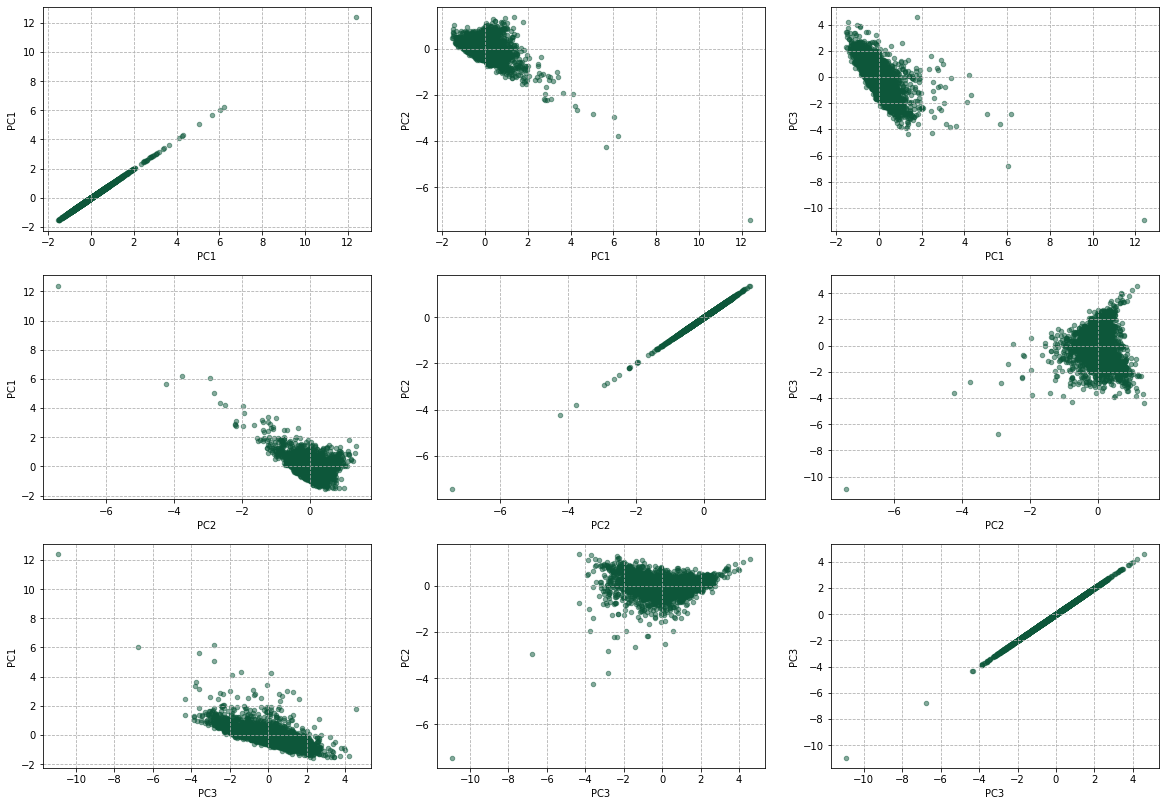

In [14]:
pca_subview = pca_view.get_view_from_kaiser_criteria()
fig, _ = pca_subview.show_principal_component_grid(20, color="#0d573a01")
fig.set_size_inches(20, 14)


# Wykresy ładunków składowych głównych

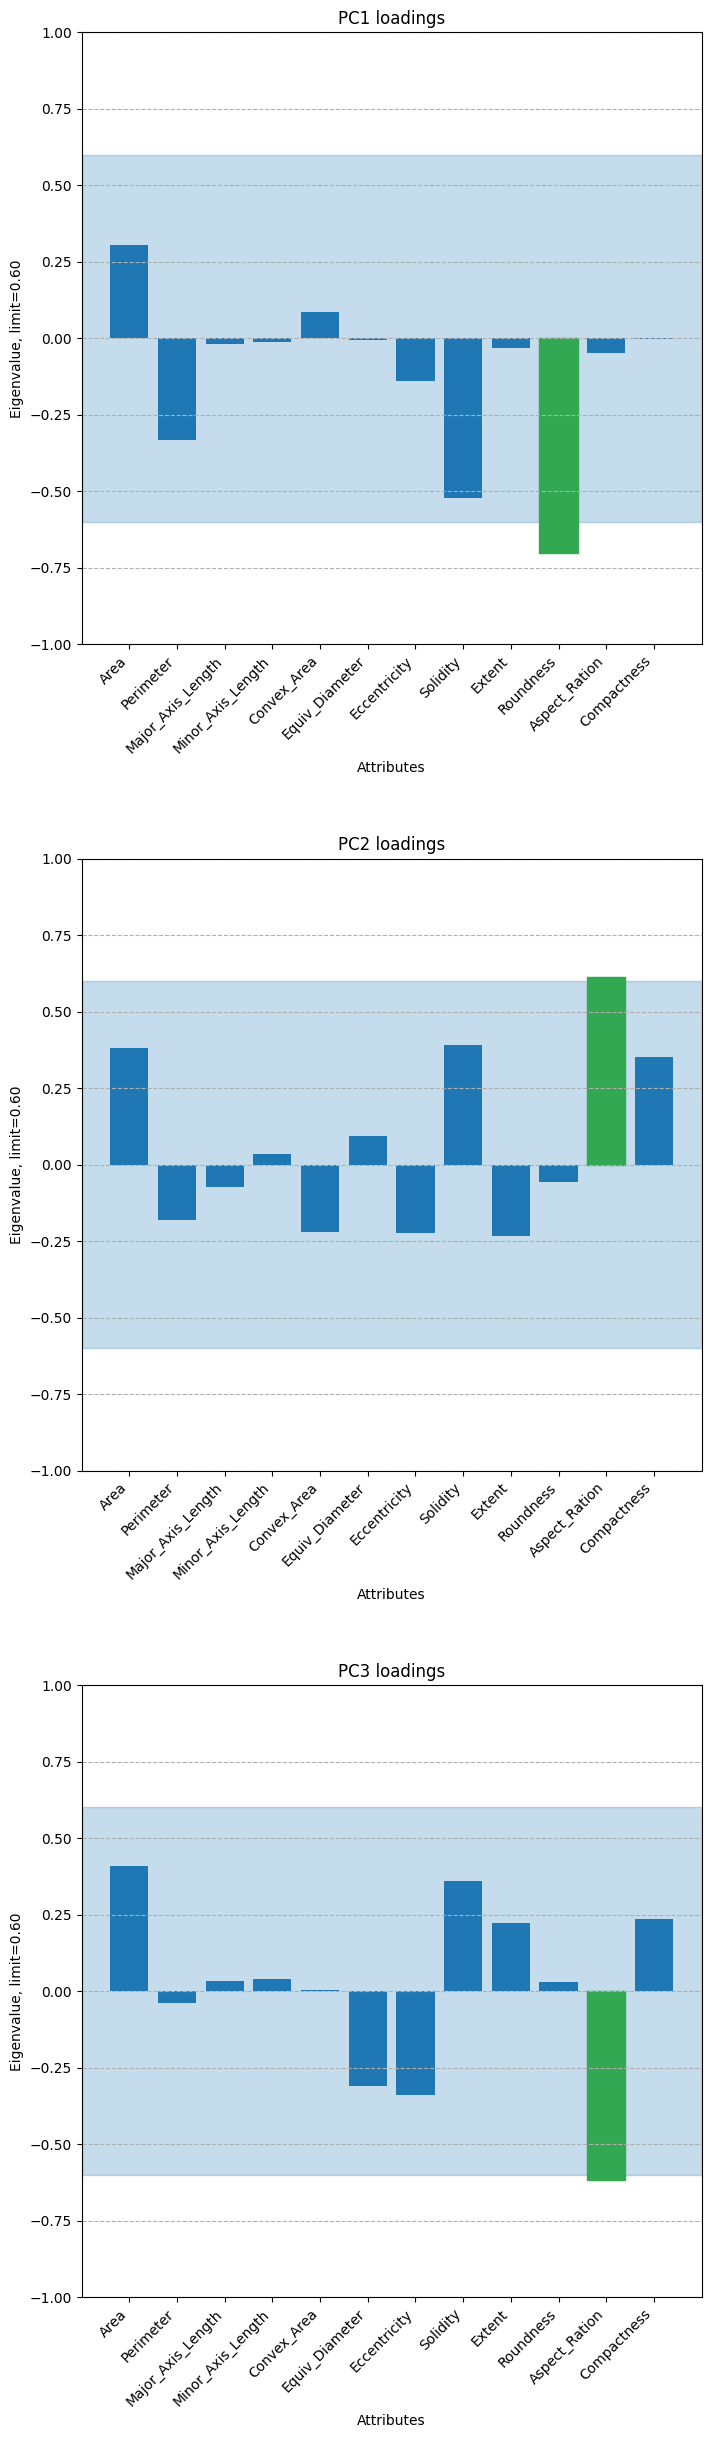

In [15]:
fig, _ = pca_subview.show_loads_grid(limit=0.6)
fig.subplots_adjust(hspace=0.35)
fig.set_size_inches(8, 30)
fig.set_dpi(100)


# Wykresy składowych głównych z wyszczególnieniem gatunków nasion

-   **Blue** - *Çerçevelik*
-   **Red** - *Ürgüp Sivrisi*

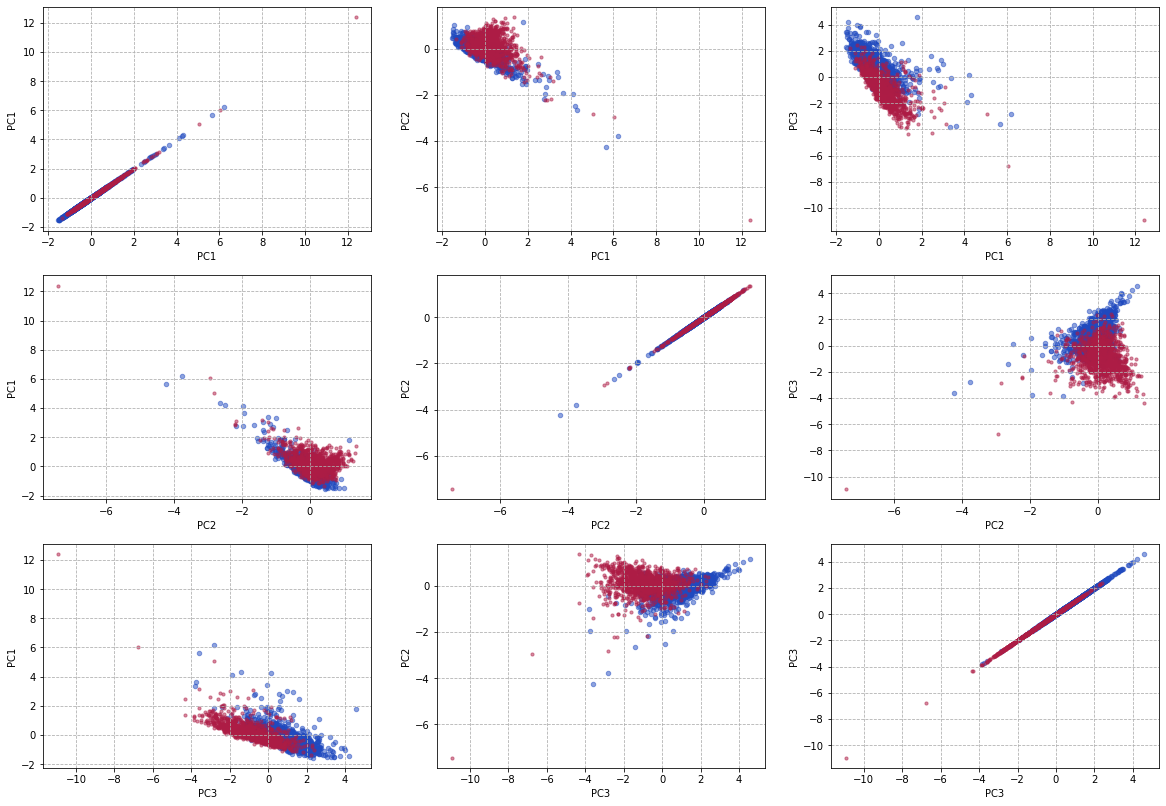

In [16]:
session.view_c()


# Wnioski

#### Składowe główne uzyskane w wyniku **PCA** maja wysoki związek z dwoma parametrami fizycznymi nasion:

-   krągłością
-   proporcją pomiędzy osią wielką a osią małą elipsy przekroju nasiona.

#### Z wykresów głównych składowych oraz wykresów ładunków wynika że:

-   **PC1** jest ujemnie skorelowana z atrybutem krągłości i wszystkie nasiona <br/>
    posiadają zbliżone wartości na tej osi. Wyszczególnienie gatunków nasion <br/>
    nie skutkuje wyraźnym zróżniowaniem pomiędzy obiektamio rónych gatunkach.<br/>

-   **PC2** jest dodatnio skorelowana z proporcią między osiami elipsy, <br/>
    wartości tej osi dla wszystkich nasion są zbliżone również nie występóje <br/>
    wyraźne grupowanie pomiędzy gatunkami.<br/>
    
-   **PC3** jest ujemnie skorelowana z proporcią między osiami elipsy, natomiast  <br/>
    w przeciwieństwie do pierwszych dwóch osi, widoczne jest grupowanie <br/>
    się obiektów o różnych gatunkach wzdłuż osi PC3.<br/>

Pomimo zbliżonej wysokiej wartości bezwzględnej ładunku proporcji dla **PC2** i **PC3**, <br/>
obiekty wyraźnie grupują się tylko wzdłuż **PC3**. Taki stan rzeczy sugeruje, że to nie <br/>
proporcja, a kombinacja pozostałych parametrów ma kluczowy wpływ na grupowanie.

Powyższe wyniki anzliy PCA nie są satysfakcjonujące i sugerują wybranie innej metody <br/>
analiz danych.
